In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import os

In [2]:
df = pd.read_csv("./Data/StudentsPerformance.csv")

Check Data Types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Categorical and Numerical columns:

In [4]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype == 'int64']

In [5]:
df.isnull().sum() 
#No Null values....

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

Unique categories in categorical column: 


In [8]:
unique_values = [f"{col} = {df[col].unique()}" for col in cat_col]
unique_values

["gender = ['female' 'male']",
 "race/ethnicity = ['group B' 'group C' 'group A' 'group D' 'group E']",
 'parental level of education = ["bachelor\'s degree" \'some college\' "master\'s degree" "associate\'s degree"\n \'high school\' \'some high school\']',
 "lunch = ['standard' 'free/reduced']",
 "test preparation course = ['none' 'completed']"]

In [9]:
df.duplicated().sum()
#No Duplicate Rows...

0

Adding two columns: Total Score & Average:

In [10]:
df['Total Score'] = df['math score'] + df['reading score'] + df['writing score']
df['Average'] = round((df['Total Score']/3), 2)

In [11]:
# Number of student with less than 20 score in math
df[df['math score'] < 20]['math score'].count()

4

# Insights

In [12]:
# Students who got full marks...
Math_Full = df[df['math score'] == 100]['Average'].count()
Reading_Full = df[df['reading score'] == 100]['Average'].count()
Writing_Full = df[df['writing score'] == 100]['Average'].count()
print(f"Number of students who got full marks in math: {Math_Full}")
print(f"Number of students who got full marks in math: {Reading_Full}")
print(f"Number of students who got full marks in math: {Writing_Full}")

Number of students who got full marks in math: 7
Number of students who got full marks in math: 17
Number of students who got full marks in math: 14


In [13]:
# Students who got less than 20 marks...
Math_less_20 = df[df['math score'] <= 20]['Average'].count()
Reading_less_20 = df[df['reading score'] <= 20]['Average'].count()
Writing_less_20 = df[df['writing score'] <= 20]['Average'].count()
print(f"Number of students who got full marks in math: {Math_less_20}")
print(f"Number of students who got full marks in math: {Reading_less_20}")
print(f"Number of students who got full marks in math: {Writing_less_20}")

Number of students who got full marks in math: 4
Number of students who got full marks in math: 1
Number of students who got full marks in math: 3


TODO: Histogram & KDE

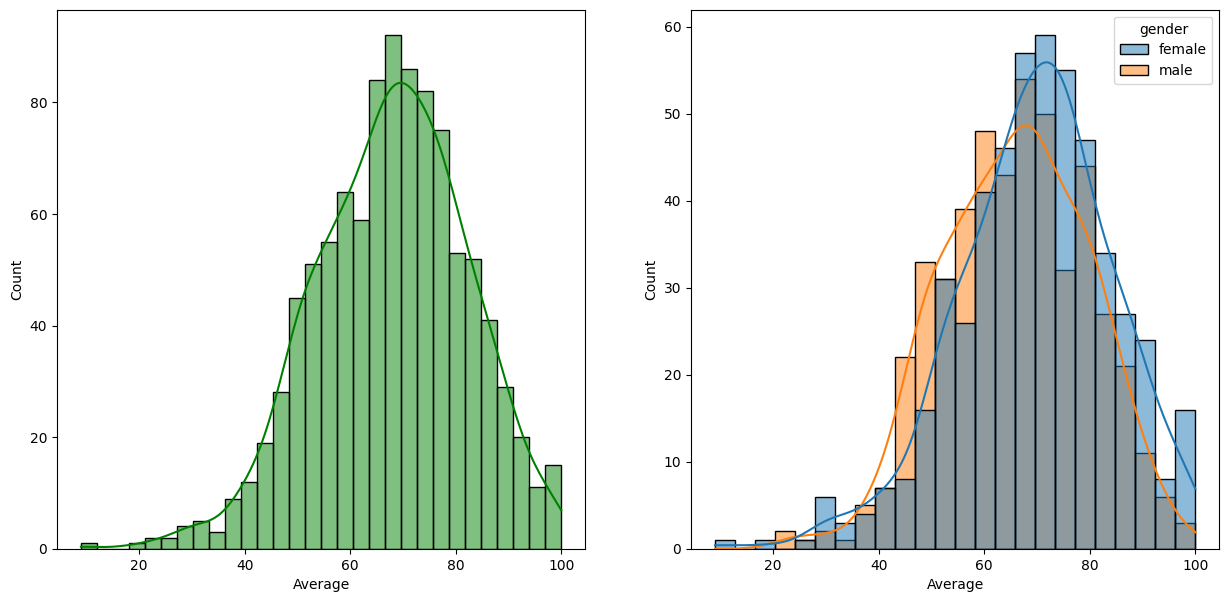

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='Average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Average', kde=True, hue='gender')
plt.show()